**IMPORT LIBRARIES**

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from keras.layers import Dense, BatchNormalization, Dropout, LSTM, GlobalMaxPooling1D, Conv1D
from mlxtend.plotting import plot_confusion_matrix
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score
from collections import Counter
from imblearn.over_sampling import SMOTE

**LOADING THE DATA**

In [2]:
churn = pd.read_csv("Bank Customer Churn Prediction.csv")
churn

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS**

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
## checking for missing values
churn.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
## encoding categorical variables to numerical values
## label encoder will be used 
le = LabelEncoder()
churn['gender'] = le.fit_transform(churn['gender'])
churn['country'] = le.fit_transform(churn['country'])




In [6]:
## dataset after encoding
churn.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [7]:
## dropping the customer_id column
churn = churn.drop('customer_id', axis = 1)

In [8]:
corr_mat = churn.corr()
corr_mat

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
country,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


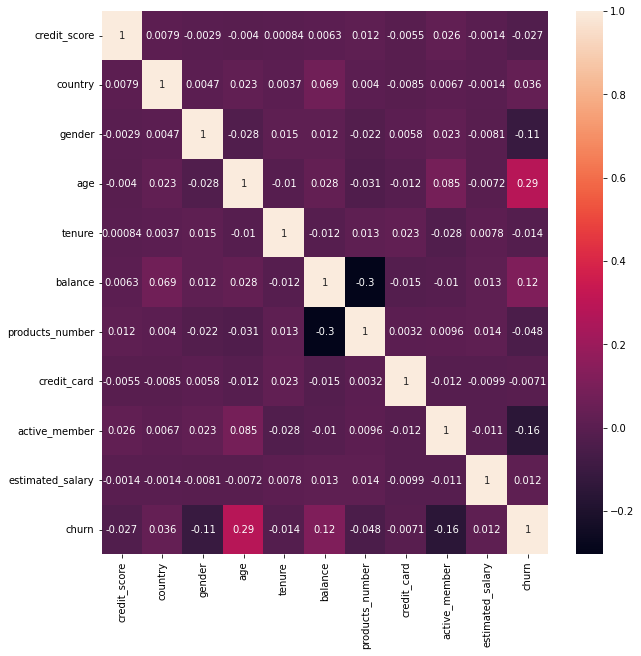

In [9]:
## plotting heatmap to find correlation between the different variable
plt.figure(figsize= (10,10))
sns.heatmap(corr_mat, annot = True)

In [10]:
## creating a new column and replacing numerical value with categorical value for easy visualization
churn['churn_label'] = churn['churn'].replace({0: 'Not_Churn', 1: 'Churn'})

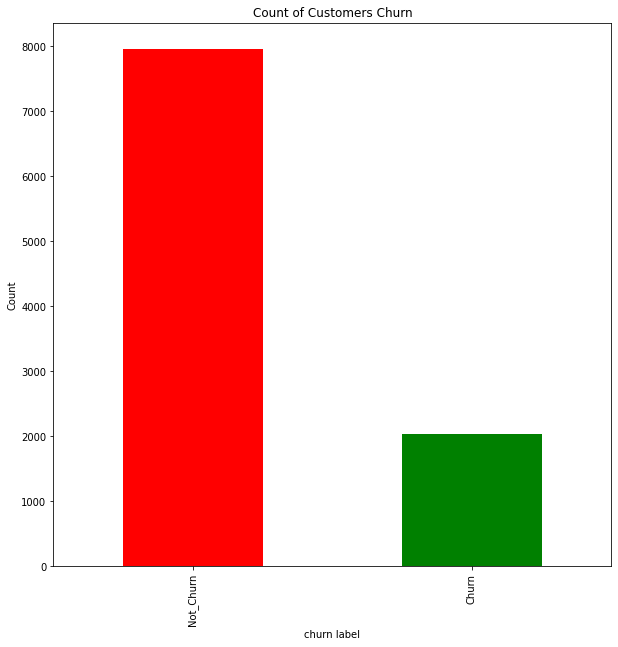

In [11]:
churn_count = churn['churn_label'].value_counts()

## plotting the bar plot
plt.figure(figsize =(10,10))
churn_count.plot(kind = 'bar', width = 0.5, color = ['red', 'green'])
plt.xlabel('churn label')
plt.ylabel('Count')
plt.title('Count of Customers Churn')
plt.show()

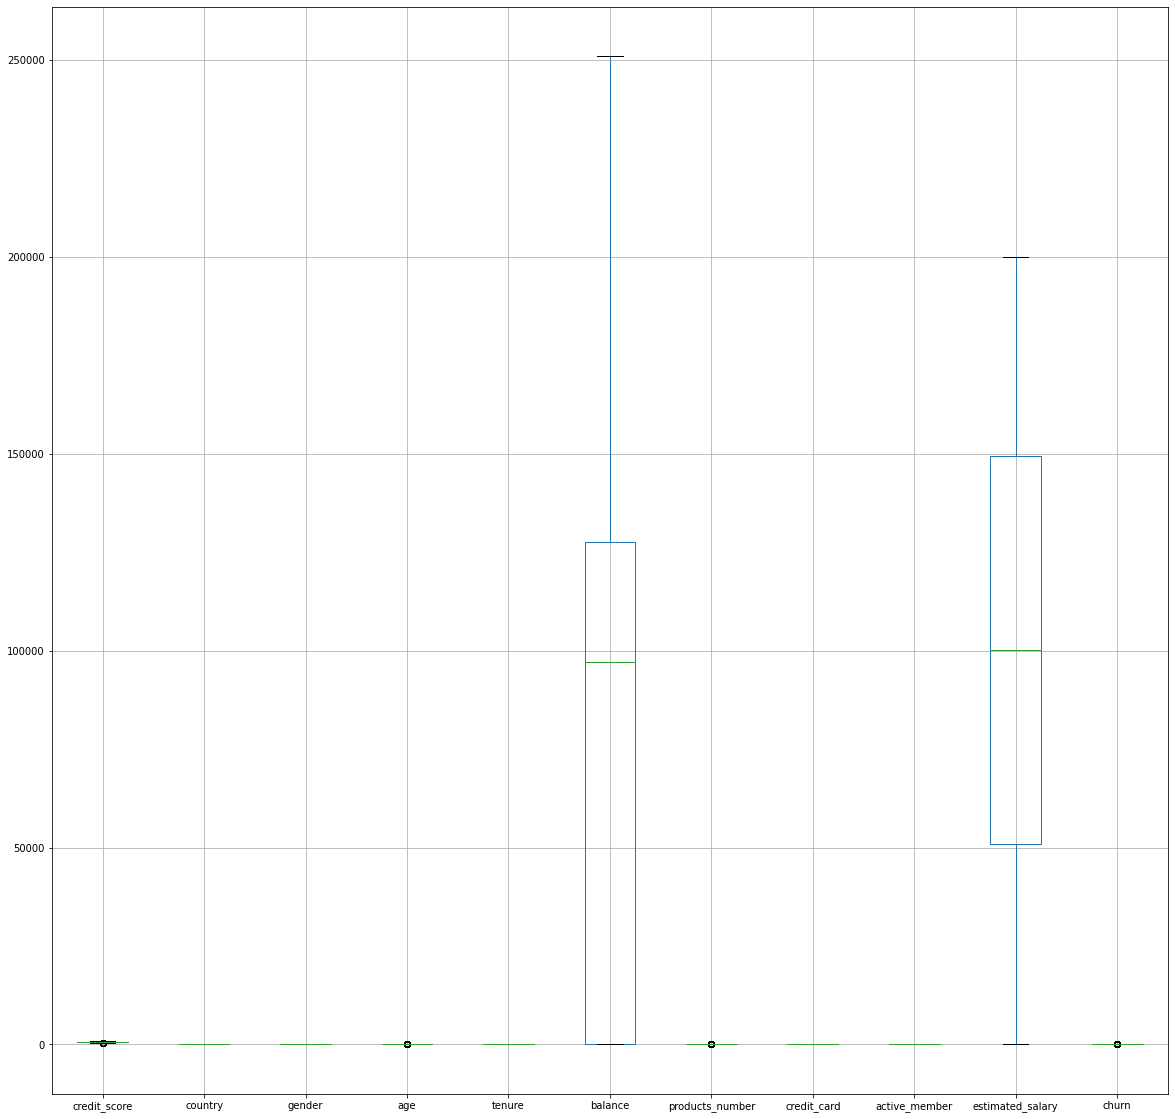

In [12]:
## plotting boxplot to detect the outliers
## the outliers below show outliers in credit score, age, product number and churn column
## churn column shows outliers because it is a case of an imbalanced dataset where not churn has higher label than churn
## so churn outliers will not be replaced with mean but instead will be balanced.
churn.boxplot(figsize=(20, 20))
plt.show()

In [28]:
## dealing with outliers
def replace_outliers_with_mean(col, churn):
    q1, q3 = churn[col].quantile(0.25), churn[col].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5 * iqr
    churn[col] = np.where(churn[col] > ul, churn[col].mean(), np.where(churn[col] < ll, churn[col].mean(), churn[col]))

columns = ['credit_score', 'age', 'products_number']
for col in columns:
    replace_outliers_with_mean(col, churn)





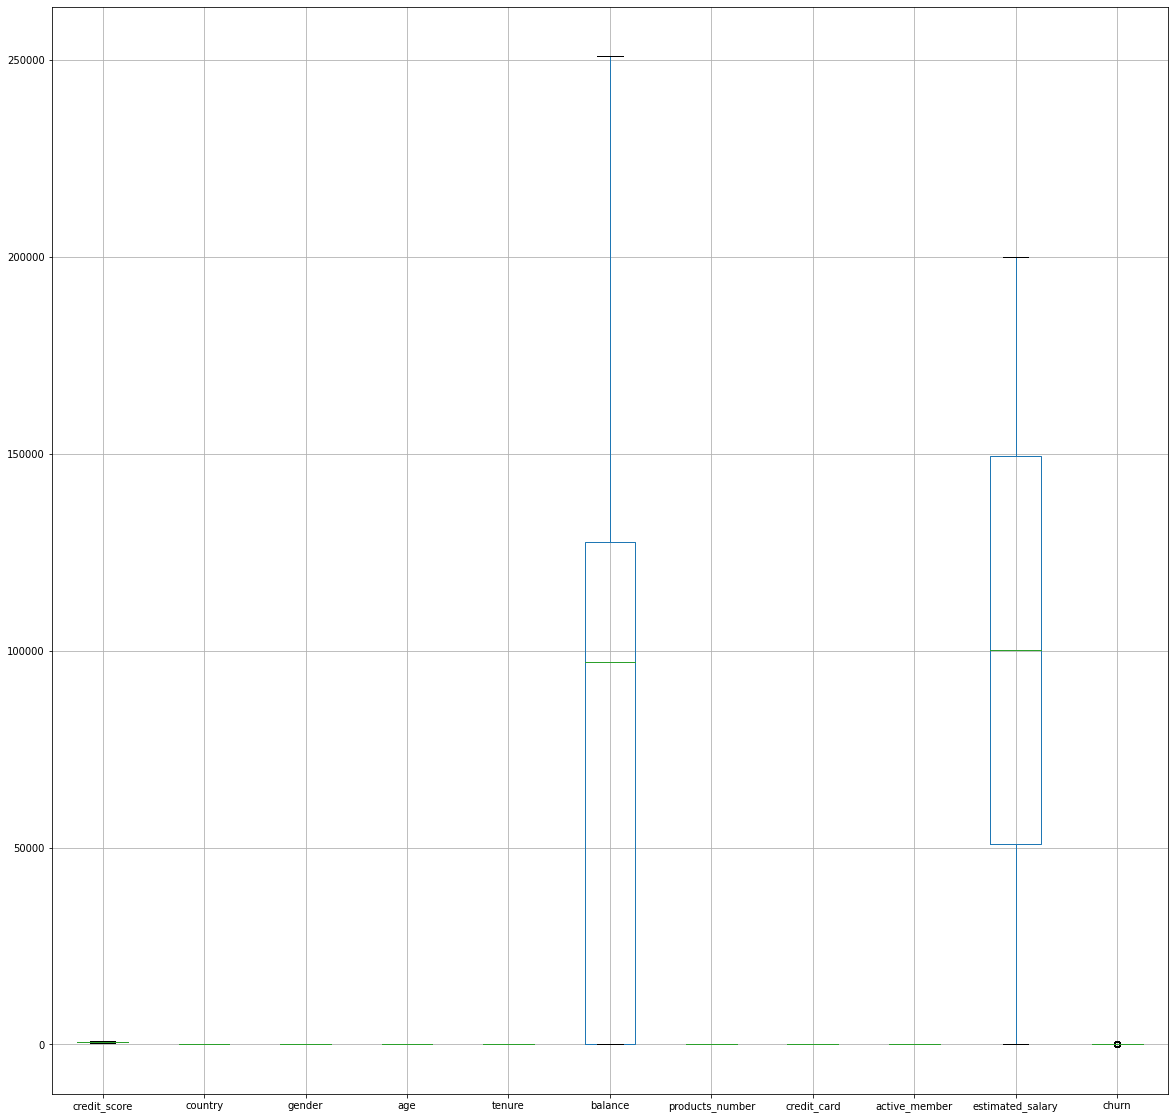

In [29]:
## boxplot after removing outliers
churn.boxplot(figsize=(20, 20))
plt.show()

In [15]:
churn

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,churn_label
0,619.0,0,0,42.0,2,0.00,1.0,1,1,101348.88,1,Churn
1,608.0,2,0,41.0,1,83807.86,1.0,0,1,112542.58,0,Not_Churn
2,502.0,0,0,42.0,8,159660.80,3.0,1,0,113931.57,1,Churn
3,699.0,0,0,39.0,1,0.00,2.0,0,0,93826.63,0,Not_Churn
4,850.0,2,0,43.0,2,125510.82,1.0,1,1,79084.10,0,Not_Churn
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0,1,39.0,5,0.00,2.0,1,0,96270.64,0,Not_Churn
9996,516.0,0,1,35.0,10,57369.61,1.0,1,1,101699.77,0,Not_Churn
9997,709.0,0,0,36.0,7,0.00,1.0,0,1,42085.58,1,Churn
9998,772.0,1,1,42.0,3,75075.31,2.0,1,0,92888.52,1,Churn


In [16]:
## data spliting
X = churn.iloc[:,0:10]
y = churn.iloc[:, -2]

In [17]:
## oversampling the minority class of churn to have a balanced dataset
bal = SMOTE()
X, y = bal.fit_resample(X, y)
print(Counter(y))


Counter({1: 7963, 0: 7963})


**DATA NORMALIZATION**

In [18]:

## MinMaxScaler scales the data between 0 and 1 by subtracting the minimum 
## value in the feature from each data point and dividing it by the range (i.e., the difference between the minimum and maximum values). 
## This is useful when the features have different scales and you want to bring them to the same scale

Scaler = MinMaxScaler()
Scaler.fit_transform(X)


array([[0.50535332, 0.        , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.48179872, 1.        , 0.        , ..., 0.        , 1.        ,
        0.56270874],
       [0.25481799, 0.        , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.56787097, 0.5       , 0.        , ..., 1.        , 1.        ,
        0.53318909],
       [0.705555  , 0.5       , 0.        , ..., 1.        , 0.        ,
        0.49769665],
       [0.75718325, 1.        , 0.        , ..., 0.        , 0.        ,
        0.77386847]])

**DATA SPLITTING**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state=32)

**MODEL BUILDING**

In [20]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth = 5)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

**SAVING THE MODEL**

In [21]:
# Load the model from disk
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [22]:
## making prediction
y_pred = loaded_model.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
4822,1,0
12857,1,1
206,1,1
11456,1,1
1741,0,0
6030,0,0
15397,1,1
14252,1,1
1798,1,1
10304,1,1


**MODEL EVALUATION**

In [23]:
#checking for the model accuracy
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.92      0.92      0.92        13

    accuracy                           0.90        20
   macro avg       0.89      0.89      0.89        20
weighted avg       0.90      0.90      0.90        20



In [24]:
## confusion matrix
cm = confusion_matrix(y_test, y_pred)

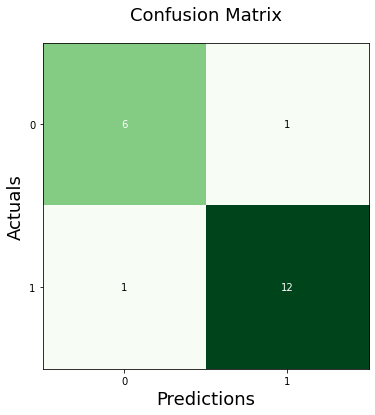

In [25]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()